# 📚 <span style='color:#0D2BA5'>Mission - Segmentez des clients d'un site e-commerce</span>

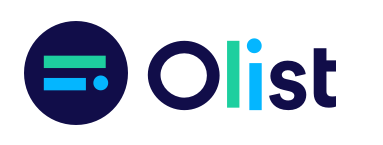

## <span style='background:#99CCFF'>Notebook 1 : Requêtes pour dashboard</span>

In [1]:
# Installation des librairies
!pip install ipython-sql --quiet
!pip install pandas --quiet

# Importer les modules
import pandas as pd

# Chargement de l'extension sqlite
%load_ext sql

In [2]:
# Connexion à la base de données
%sql sqlite:///olist.db

In [3]:
# Liste des tables de la BDD
tables = %sql SELECT name FROM sqlite_master WHERE type='table';
display(tables)

 * sqlite:///olist.db
Done.


name
customers
geoloc
order_items
order_pymts
order_reviews
orders
products
sellers
translation


# <font color='RoyalBlue'>1. Structure des tables

In [4]:
#strucures des tables 
for table in tables:
    table_name = table[0]
    structure = %sql PRAGMA table_info($table_name);
    first_row = %sql SELECT * FROM $table_name LIMIT 1;
    print(f"Structure de la table '{table_name}':")
    display(structure)
    print(f"1ère ligne de la table '{table_name}':")    
    display(first_row)
    print()

 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'customers':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,customer_id,TEXT,0,None,0
2,customer_unique_id,TEXT,0,None,0
3,customer_zip_code_prefix,BIGINT,0,None,0
4,customer_city,TEXT,0,None,0
5,customer_state,TEXT,0,None,0


1ère ligne de la table 'customers':


index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'geoloc':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,geolocation_zip_code_prefix,BIGINT,0,None,0
2,geolocation_lat,FLOAT,0,None,0
3,geolocation_lng,FLOAT,0,None,0
4,geolocation_city,TEXT,0,None,0
5,geolocation_state,TEXT,0,None,0


1ère ligne de la table 'geoloc':


index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562128115268,-46.63929204800168,sao paulo,SP



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'order_items':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,order_id,TEXT,0,None,0
2,order_item_id,BIGINT,0,None,0
3,product_id,TEXT,0,None,0
4,seller_id,TEXT,0,None,0
5,shipping_limit_date,TEXT,0,None,0
6,price,FLOAT,0,None,0
7,freight_value,FLOAT,0,None,0


1ère ligne de la table 'order_items':


index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'order_pymts':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,order_id,TEXT,0,None,0
2,payment_sequential,BIGINT,0,None,0
3,payment_type,TEXT,0,None,0
4,payment_installments,BIGINT,0,None,0
5,payment_value,FLOAT,0,None,0


1ère ligne de la table 'order_pymts':


index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'order_reviews':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,review_id,TEXT,0,None,0
2,order_id,TEXT,0,None,0
3,review_score,BIGINT,0,None,0
4,review_comment_title,TEXT,0,None,0
5,review_comment_message,TEXT,0,None,0
6,review_creation_date,TEXT,0,None,0
7,review_answer_timestamp,TEXT,0,None,0


1ère ligne de la table 'order_reviews':


index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'orders':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,order_id,TEXT,0,None,0
2,customer_id,TEXT,0,None,0
3,order_status,TEXT,0,None,0
4,order_purchase_timestamp,TEXT,0,None,0
5,order_approved_at,TEXT,0,None,0
6,order_delivered_carrier_date,TEXT,0,None,0
7,order_delivered_customer_date,TEXT,0,None,0
8,order_estimated_delivery_date,TEXT,0,None,0


1ère ligne de la table 'orders':


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'products':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,product_id,TEXT,0,None,0
2,product_category_name,TEXT,0,None,0
3,product_name_lenght,FLOAT,0,None,0
4,product_description_lenght,FLOAT,0,None,0
5,product_photos_qty,FLOAT,0,None,0
6,product_weight_g,FLOAT,0,None,0
7,product_length_cm,FLOAT,0,None,0
8,product_height_cm,FLOAT,0,None,0
9,product_width_cm,FLOAT,0,None,0


1ère ligne de la table 'products':


index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'sellers':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,seller_id,TEXT,0,None,0
2,seller_zip_code_prefix,BIGINT,0,None,0
3,seller_city,TEXT,0,None,0
4,seller_state,TEXT,0,None,0


1ère ligne de la table 'sellers':


index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'translation':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,product_category_name,TEXT,0,None,0
2,product_category_name_english,TEXT,0,None,0


1ère ligne de la table 'translation':


index,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


## <span style='background:#99CCFF'> Schéma relationnel de la base de données

![Schéma relationnel](./shéma%20relationnel.png)



***Ce schéma montre comment les différentes entités de la base de données Olist sont interconnectées, ce qui est crucial pour effectuer des requêtes SQL complexes qui nécessitent des jointures entre plusieurs tables.***

***Le jeu de données Olist comporte plusieurs tables interconnectées. Voici une analyse de chaque table et des précisions sur les relations entre elles :***

<font color='DodgerBlue'>**Table orders**
- **order_id :** Identifiant unique de la commande.
- **customer_id :** Identifiant du client, utilisé comme clé pour la relation avec customers.customer_id.
- **order_status :** Statut de la commande (ex. : delivered, shipped, canceled).
- **order_purchase_timestamp :** Date et heure de l'achat.
- **order_approved_at :** Date et heure de validation du paiement.
- **order_delivered_carrier_date :** Date de prise en charge par le transporteur.
- **order_delivered_customer_date :** Date réelle de livraison au client.
- **order_estimated_delivery_date :** Date estimée de livraison, communiquée au client au moment de l'achat.
****
<font color='DodgerBlue'>**Table order_items**
- **order_id :** Identifiant de la commande, clé étrangère vers orders.order_id.
- **order_item_id :** Identifiant de l'article au sein de la commande.
- **product_id :** Identifiant du produit, clé étrangère vers products.product_id.
- **seller_id :** Identifiant du vendeur, clé étrangère vers sellers.seller_id.
- **shipping_limit_date :** Date limite de livraison pour l'article.
- **price :** Prix de l'article.
- **freight_value :** Frais de port de l'article.
****
**Précisions**
****
***Une commande peut contenir plusieurs produits.
Chaque produit peut être livré par un vendeur différent.
Si un produit est acheté en quantité X dans une commande, il fera l'objet de X enregistrements dans cette table.
La valeur totale d'une commande order_id est la somme des champs price et freight_value des lignes ayant ce order_id.***
*****
<font color='DodgerBlue'>**Table order_payments**
- **order_id :** Identifiant de la commande, clé étrangère vers orders.order_id.
- **payment_sequential :** Séquence de paiement (utile si un client utilise plusieurs méthodes de paiement pour une commande).
- **payment_type :** Type de paiement (ex. : credit_card, boleto, voucher).
- **payment_installments :** Nombre de versements pour le paiement.
- **payment_value :** Montant du paiement.
****
**Précisions**
****
***Un client peut payer une commande avec plus d'une méthode de paiement.
Dans ce cas, une séquence payment_sequential est créée.***
****
<font color='DodgerBlue'>**Table customers**
- **customer_id :** Identifiant unique du client, utilisé comme clé pour la relation avec orders.customer_id.
- **customer_unique_id :** Identifiant unique de client (indépendant du nombre de commandes passées).
- **customer_zip_code_prefix :** Préfixe du code postal du client.
- **customer_city :** Ville du client.
- **customer_state :** État du client.
****
**Précisions**
****
***Chaque commande possède un customer_id unique : si un client passe plusieurs commandes, chaque commande se verra attribuer un customer_id différent.
Le champ customer_unique_id reste identique pour un même client quelles que soient ses commandes.***
****
<font color='DodgerBlue'>**Table order_reviews**
- **review_id :** Identifiant unique de l'avis.
- **order_id :** Identifiant de la commande, clé étrangère vers orders.order_id.
- **review_score :** Note de l'avis (de 1 à 5).
- **review_comment_title :** Titre de l'avis.
- **review_comment_message :** Message de l'avis.
- **review_creation_date :** Date de création de l'avis.
- **review_answer_timestamp :** Date de réponse à l'avis.
****
<font color='DodgerBlue'>**Table products**
- **product_id :** Identifiant unique du produit.
- **product_category_name :** Catégorie du produit.
- **product_name_length :** Longueur du nom du produit.
- **product_description_length :** Longueur de la description du produit.
- **product_photos_qty :** Quantité de photos du produit.
- **product_weight_g :** Poids du produit en grammes.
- **product_length_cm :** Longueur du produit en centimètres.
- **product_height_cm :** Hauteur du produit en centimètres.
- **product_width_cm :** Largeur du produit en centimètres.
****
<font color='DodgerBlue'>**Table sellers**
- **seller_id :** Identifiant unique du vendeur.
- **seller_zip_code_prefix :** Préfixe du code postal du vendeur.
- **seller_city :** Ville du vendeur.
- **seller_state :** État du vendeur.
****
<font color='DodgerBlue'>**Table geolocation**
- **geolocation_zip_code_prefix :** Préfixe du code postal pour la géolocalisation.
- **geolocation_lat :** Latitude pour la géolocalisation.
- **geolocation_lng :** Longitude pour la géolocalisation.
- **geolocation_city :** Ville pour la géolocalisation.
- **geolocation_state :** État pour la géolocalisation.
****
<font color='DodgerBlue'>**Table translation**
- **product_category_name :** Nom de la catégorie du produit en portugais.
- **product_category_name_english :** Nom de la catégorie du produit en anglais

In [5]:
# Affichage des statuts de commande uniques
%sql SELECT DISTINCT(order_status) FROM orders;

 * sqlite:///olist.db
Done.


order_status
delivered
invoiced
shipped
processing
unavailable
canceled
created
approved


# <span style='background:#99CCFF'>2. Requêtes pour dashboard

In [6]:
# Affichage des statuts de commande uniques
%sql SELECT DISTINCT(order_status) FROM orders;

 * sqlite:///olist.db
Done.


order_status
delivered
invoiced
shipped
processing
unavailable
canceled
created
approved


In [7]:
# Recherche de la date la plus récente entre les dates d'achat et d'approbation
most_recent_date = %sql SELECT MAX(MAX(order_purchase_timestamp), MAX(order_approved_at)) AS most_recent FROM orders;
print(most_recent_date)

 * sqlite:///olist.db
Done.
+---------------------+
|     most_recent     |
+---------------------+
| 2018-10-17 17:30:18 |
+---------------------+


### <span style='background:PowderBlue'>2.1 Commandes récentes avec retard

In [8]:
# Commandes récentes avec retard
query1 = """
WITH DerniereCommande AS (
    SELECT MAX(order_purchase_timestamp) AS date_livraison_recente
    FROM orders
)
SELECT *
FROM orders
JOIN DerniereCommande ON 1=1
WHERE order_status <> 'canceled'
AND order_delivered_customer_date IS NOT NULL
AND order_delivered_customer_date >= date(order_estimated_delivery_date, '+3 days')
AND order_purchase_timestamp >= date(date_livraison_recente, '-3 months');
"""
result1 = %sql {query1}
display(pd.DataFrame(result1))

 * sqlite:///olist.db
Done.


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_livraison_recente
0,561,cfa4fa27b417971e86d8127cb688712f,7093250e1741ebbed41f0cc552025fd6,delivered,2018-08-16 09:44:23,2018-08-17 03:10:22,2018-08-17 18:55:00,2018-08-29 01:41:41,2018-08-22 00:00:00,2018-10-17 17:30:18
1,711,234c056c50619f48da64f731c48242b4,44e460a655f7154ccd9faa4dbbbaf68a,delivered,2018-08-14 14:49:15,2018-08-15 03:15:15,2018-08-31 15:25:00,2018-09-01 18:14:42,2018-08-23 00:00:00,2018-10-17 17:30:18
2,728,8ad3f1d0f96992e43566c4c82c9f6c58,948b29e24216a05fea13a18d8db45ea5,delivered,2018-07-17 21:25:29,2018-07-17 21:35:17,2018-07-18 13:08:00,2018-08-14 04:04:40,2018-08-03 00:00:00,2018-10-17 17:30:18
3,1844,7f579e203c931f3e8410103359c6d523,d665be250d1c687c58fdea61a9b55a58,delivered,2018-08-02 18:09:27,2018-08-02 18:43:43,2018-08-10 14:15:00,2018-08-13 20:11:47,2018-08-09 00:00:00,2018-10-17 17:30:18
4,1967,cb6e441ff2ef574ce08d3709426f88ec,4fb843d304c57182d4aa27bb39ca592b,delivered,2018-08-08 19:27:03,2018-08-08 19:44:59,2018-08-10 13:32:00,2018-08-18 01:11:58,2018-08-15 00:00:00,2018-10-17 17:30:18
...,...,...,...,...,...,...,...,...,...,...
317,98368,874a7690bc049bd4ce210d195bdfff7b,f6b2c83ea477af36f44a1e2df7320036,delivered,2018-08-02 12:06:47,2018-08-02 13:05:56,2018-08-10 14:42:00,2018-08-13 15:50:48,2018-08-08 00:00:00,2018-10-17 17:30:18
318,98382,587e32dd528769d669d539531d32aeb5,0af8a25fb0b6f833724bb5818275807b,delivered,2018-08-10 11:46:09,2018-08-11 02:50:25,2018-08-14 10:09:00,2018-09-03 09:32:31,2018-08-28 00:00:00,2018-10-17 17:30:18
319,98564,3adb141ba4bd69dd7fe8d3fb733c6b74,c0539d5c87fc7c97a8418adffe4b45f0,delivered,2018-08-14 23:29:21,2018-08-16 03:05:11,2018-08-16 13:28:00,2018-08-28 18:02:52,2018-08-24 00:00:00,2018-10-17 17:30:18
320,99279,4cf09d9e5ebbe0f91ddd7bf9aae891cd,07b6b4fe5fefb948fc76b6d2bdba77d8,delivered,2018-07-19 08:37:26,2018-07-21 03:25:17,2018-07-23 15:31:00,2018-08-21 01:12:45,2018-08-10 00:00:00,2018-10-17 17:30:18


### <span style='background:PowderBlue'>2.2 Vendeurs ayant généré un chiffre d'affaires de plus de 100 000 Real

In [9]:
# Vendeurs > 100K
query2 = """
WITH orders_joined AS (
    SELECT DISTINCT i.seller_id, i.order_id, i.price, o.order_purchase_timestamp
    FROM order_items AS i
    INNER JOIN orders AS o ON o.order_id = i.order_id
    WHERE o.order_status = 'delivered'
    ORDER BY seller_id, order_purchase_timestamp
),
Revenue AS (
    SELECT seller_id, SUM(price) AS total_revenue
    FROM orders_joined
    GROUP BY seller_id
)
SELECT seller_id, total_revenue
FROM Revenue
WHERE total_revenue > 100000
ORDER BY total_revenue DESC;
"""
result2 = %sql {query2}
display(pd.DataFrame(result2))

 * sqlite:///olist.db
Done.


,seller_id,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,224921.54
1,53243585a1d6dc2643021fd1853d8905,203364.00
2,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
3,4a3ca9315b744ce9f8e9374361493884,183828.07
4,7e93a43ef30c4f03f38b393420bc753a,165822.49
5,da8622b14eb17ae2831f4ac5b9dab84a,141875.38
6,7c67e1448b00f6e969d365cea6b010ab,140998.62
7,7a67c85e85bb2ce8582c35f2203ad736,139098.77
8,46dc3b2cc0980fb8ec44634e21d2718e,120671.54
9,6560211a19b47992c3666cc44a7e94c0,116660.83


### <span style='background:PowderBlue'>2.3 Nouveaux vendeurs engagés

In [10]:
# Nouveaux vendeurs engagés
query3 = """
WITH date_max AS (
    SELECT MAX(order_purchase_timestamp) AS date_derniere_commande
    FROM orders
),
nouveaux_vendeurs AS (
    SELECT oi.seller_id, MIN(o.order_purchase_timestamp) AS premiere_vente, COUNT(oi.order_item_id) AS nombre_de_produits_vendus
    FROM order_items AS oi
    INNER JOIN orders AS o ON oi.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY oi.seller_id
    HAVING premiere_vente > DATE((SELECT date_derniere_commande FROM date_max), '-3 months')
)
SELECT seller_id, nombre_de_produits_vendus
FROM nouveaux_vendeurs
WHERE nombre_de_produits_vendus > 30
ORDER BY nombre_de_produits_vendus DESC;
"""
result3 = %sql {query3}
display(pd.DataFrame(result3))

 * sqlite:///olist.db
Done.


,seller_id,nombre_de_produits_vendus
0,d13e50eaa47b4cbe9eb81465865d8cfc,68
1,81f89e42267213cb94da7ddc301651da,52
2,240b9776d844d37535668549a396af32,35


### <span style='background:PowderBlue'>2.4 Pires codes postaux

In [11]:
# 5 pires codes postaux
query4 = """
    WITH PostalScores AS (
        SELECT c.customer_zip_code_prefix, AVG(r.review_score) AS average_score, COUNT(*) AS total_orders
        FROM order_reviews r
        JOIN orders o ON r.order_id = o.order_id
        JOIN customers c ON o.customer_id = c.customer_id
        WHERE o.order_purchase_timestamp BETWEEN '2017-09-01' AND '2018-09-01'
        GROUP BY c.customer_zip_code_prefix
        HAVING total_orders > 30
    )
    SELECT customer_zip_code_prefix, average_score
    FROM PostalScores
    ORDER BY average_score ASC
    LIMIT 5;
    """
result4 = %sql {query4}
display(pd.DataFrame(result4))

 * sqlite:///olist.db
Done.


,customer_zip_code_prefix,average_score
0,22753,2.826923
1,22770,3.184211
2,13056,3.272727
3,22793,3.284211
4,21321,3.325581


### <span style='background:PowderBlue'>2.5 Enregistrement des requêtes

In [12]:
# Dictionnaire de requêtes
queries = {
    "Commandes récentes avec retard": query1,
    "Vendeurs > 100K": query2,
    "Nouveaux vendeurs engagés": query3,
    "5 pires codes postaux": query4
}

# Enregistrement des requêtes dans un fichier SQL
with open('dashboard_queries.sql', 'w', encoding='utf-8') as file:
    for title, query in queries.items():
        file.write(f"-- {title}\n")  # Ajouter un commentaire avec le titre de la requête
        file.write(query)
        file.write("\n\n")  # Ajouter une nouvelle ligne entre chaque requête pour la lisibilité

print("Les requêtes ont été enregistrées dans 'dashboard_queries.sql'")

Les requêtes ont été enregistrées dans 'dashboard_queries.sql'


# 📚 <span style='color:#0D2BA5'>Mission - Segmentez des clients d'un site e-commerce</span>

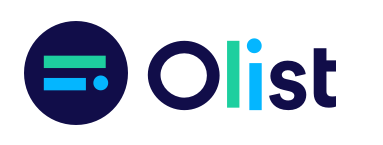

## <span style='background:#99CCFF'>Notebook 1 : Requêtes pour dashboard</span>

In [13]:
# Installation des librairies
!pip install ipython-sql --quiet
!pip install pandas --quiet

# Importer les modules
import pandas as pd

# Chargement de l'extension sqlite
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
# Connexion à la base de données
%sql sqlite:///olist.db

In [15]:
# Liste des tables de la BDD
tables = %sql SELECT name FROM sqlite_master WHERE type='table';
display(tables)

 * sqlite:///olist.db
Done.


name
customers
geoloc
order_items
order_pymts
order_reviews
orders
products
sellers
translation


# <font color='RoyalBlue'>1. Structure des tables

In [16]:
#strucures des tables 
for table in tables:
    table_name = table[0]
    structure = %sql PRAGMA table_info($table_name);
    first_row = %sql SELECT * FROM $table_name LIMIT 1;
    print(f"Structure de la table '{table_name}':")
    display(structure)
    print(f"1ère ligne de la table '{table_name}':")    
    display(first_row)
    print()

 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'customers':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,customer_id,TEXT,0,None,0
2,customer_unique_id,TEXT,0,None,0
3,customer_zip_code_prefix,BIGINT,0,None,0
4,customer_city,TEXT,0,None,0
5,customer_state,TEXT,0,None,0


1ère ligne de la table 'customers':


index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'geoloc':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,geolocation_zip_code_prefix,BIGINT,0,None,0
2,geolocation_lat,FLOAT,0,None,0
3,geolocation_lng,FLOAT,0,None,0
4,geolocation_city,TEXT,0,None,0
5,geolocation_state,TEXT,0,None,0


1ère ligne de la table 'geoloc':


index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562128115268,-46.63929204800168,sao paulo,SP



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'order_items':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,order_id,TEXT,0,None,0
2,order_item_id,BIGINT,0,None,0
3,product_id,TEXT,0,None,0
4,seller_id,TEXT,0,None,0
5,shipping_limit_date,TEXT,0,None,0
6,price,FLOAT,0,None,0
7,freight_value,FLOAT,0,None,0


1ère ligne de la table 'order_items':


index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'order_pymts':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,order_id,TEXT,0,None,0
2,payment_sequential,BIGINT,0,None,0
3,payment_type,TEXT,0,None,0
4,payment_installments,BIGINT,0,None,0
5,payment_value,FLOAT,0,None,0


1ère ligne de la table 'order_pymts':


index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'order_reviews':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,review_id,TEXT,0,None,0
2,order_id,TEXT,0,None,0
3,review_score,BIGINT,0,None,0
4,review_comment_title,TEXT,0,None,0
5,review_comment_message,TEXT,0,None,0
6,review_creation_date,TEXT,0,None,0
7,review_answer_timestamp,TEXT,0,None,0


1ère ligne de la table 'order_reviews':


index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'orders':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,order_id,TEXT,0,None,0
2,customer_id,TEXT,0,None,0
3,order_status,TEXT,0,None,0
4,order_purchase_timestamp,TEXT,0,None,0
5,order_approved_at,TEXT,0,None,0
6,order_delivered_carrier_date,TEXT,0,None,0
7,order_delivered_customer_date,TEXT,0,None,0
8,order_estimated_delivery_date,TEXT,0,None,0


1ère ligne de la table 'orders':


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'products':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,product_id,TEXT,0,None,0
2,product_category_name,TEXT,0,None,0
3,product_name_lenght,FLOAT,0,None,0
4,product_description_lenght,FLOAT,0,None,0
5,product_photos_qty,FLOAT,0,None,0
6,product_weight_g,FLOAT,0,None,0
7,product_length_cm,FLOAT,0,None,0
8,product_height_cm,FLOAT,0,None,0
9,product_width_cm,FLOAT,0,None,0


1ère ligne de la table 'products':


index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'sellers':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,seller_id,TEXT,0,None,0
2,seller_zip_code_prefix,BIGINT,0,None,0
3,seller_city,TEXT,0,None,0
4,seller_state,TEXT,0,None,0


1ère ligne de la table 'sellers':


index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP



 * sqlite:///olist.db
Done.
 * sqlite:///olist.db
Done.
Structure de la table 'translation':


cid,name,type,notnull,dflt_value,pk
0,index,BIGINT,0,None,0
1,product_category_name,TEXT,0,None,0
2,product_category_name_english,TEXT,0,None,0


1ère ligne de la table 'translation':


index,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


## <span style='background:#99CCFF'> Schéma relationnel de la base de données

![Schéma relationnel](./shéma%20relationnel.png)



***Ce schéma montre comment les différentes entités de la base de données Olist sont interconnectées, ce qui est crucial pour effectuer des requêtes SQL complexes qui nécessitent des jointures entre plusieurs tables.***

***Le jeu de données Olist comporte plusieurs tables interconnectées. Voici une analyse de chaque table et des précisions sur les relations entre elles :***

<font color='DodgerBlue'>**Table orders**
- **order_id :** Identifiant unique de la commande.
- **customer_id :** Identifiant du client, utilisé comme clé pour la relation avec customers.customer_id.
- **order_status :** Statut de la commande (ex. : delivered, shipped, canceled).
- **order_purchase_timestamp :** Date et heure de l'achat.
- **order_approved_at :** Date et heure de validation du paiement.
- **order_delivered_carrier_date :** Date de prise en charge par le transporteur.
- **order_delivered_customer_date :** Date réelle de livraison au client.
- **order_estimated_delivery_date :** Date estimée de livraison, communiquée au client au moment de l'achat.
****
<font color='DodgerBlue'>**Table order_items**
- **order_id :** Identifiant de la commande, clé étrangère vers orders.order_id.
- **order_item_id :** Identifiant de l'article au sein de la commande.
- **product_id :** Identifiant du produit, clé étrangère vers products.product_id.
- **seller_id :** Identifiant du vendeur, clé étrangère vers sellers.seller_id.
- **shipping_limit_date :** Date limite de livraison pour l'article.
- **price :** Prix de l'article.
- **freight_value :** Frais de port de l'article.
****
**Précisions**
****
***Une commande peut contenir plusieurs produits.
Chaque produit peut être livré par un vendeur différent.
Si un produit est acheté en quantité X dans une commande, il fera l'objet de X enregistrements dans cette table.
La valeur totale d'une commande order_id est la somme des champs price et freight_value des lignes ayant ce order_id.***
*****
<font color='DodgerBlue'>**Table order_payments**
- **order_id :** Identifiant de la commande, clé étrangère vers orders.order_id.
- **payment_sequential :** Séquence de paiement (utile si un client utilise plusieurs méthodes de paiement pour une commande).
- **payment_type :** Type de paiement (ex. : credit_card, boleto, voucher).
- **payment_installments :** Nombre de versements pour le paiement.
- **payment_value :** Montant du paiement.
****
**Précisions**
****
***Un client peut payer une commande avec plus d'une méthode de paiement.
Dans ce cas, une séquence payment_sequential est créée.***
****
<font color='DodgerBlue'>**Table customers**
- **customer_id :** Identifiant unique du client, utilisé comme clé pour la relation avec orders.customer_id.
- **customer_unique_id :** Identifiant unique de client (indépendant du nombre de commandes passées).
- **customer_zip_code_prefix :** Préfixe du code postal du client.
- **customer_city :** Ville du client.
- **customer_state :** État du client.
****
**Précisions**
****
***Chaque commande possède un customer_id unique : si un client passe plusieurs commandes, chaque commande se verra attribuer un customer_id différent.
Le champ customer_unique_id reste identique pour un même client quelles que soient ses commandes.***
****
<font color='DodgerBlue'>**Table order_reviews**
- **review_id :** Identifiant unique de l'avis.
- **order_id :** Identifiant de la commande, clé étrangère vers orders.order_id.
- **review_score :** Note de l'avis (de 1 à 5).
- **review_comment_title :** Titre de l'avis.
- **review_comment_message :** Message de l'avis.
- **review_creation_date :** Date de création de l'avis.
- **review_answer_timestamp :** Date de réponse à l'avis.
****
<font color='DodgerBlue'>**Table products**
- **product_id :** Identifiant unique du produit.
- **product_category_name :** Catégorie du produit.
- **product_name_length :** Longueur du nom du produit.
- **product_description_length :** Longueur de la description du produit.
- **product_photos_qty :** Quantité de photos du produit.
- **product_weight_g :** Poids du produit en grammes.
- **product_length_cm :** Longueur du produit en centimètres.
- **product_height_cm :** Hauteur du produit en centimètres.
- **product_width_cm :** Largeur du produit en centimètres.
****
<font color='DodgerBlue'>**Table sellers**
- **seller_id :** Identifiant unique du vendeur.
- **seller_zip_code_prefix :** Préfixe du code postal du vendeur.
- **seller_city :** Ville du vendeur.
- **seller_state :** État du vendeur.
****
<font color='DodgerBlue'>**Table geolocation**
- **geolocation_zip_code_prefix :** Préfixe du code postal pour la géolocalisation.
- **geolocation_lat :** Latitude pour la géolocalisation.
- **geolocation_lng :** Longitude pour la géolocalisation.
- **geolocation_city :** Ville pour la géolocalisation.
- **geolocation_state :** État pour la géolocalisation.
****
<font color='DodgerBlue'>**Table translation**
- **product_category_name :** Nom de la catégorie du produit en portugais.
- **product_category_name_english :** Nom de la catégorie du produit en anglais

In [17]:
# Affichage des statuts de commande uniques
%sql SELECT DISTINCT(order_status) FROM orders;

 * sqlite:///olist.db
Done.


order_status
delivered
invoiced
shipped
processing
unavailable
canceled
created
approved


# <span style='background:#99CCFF'>2. Requêtes pour dashboard

In [18]:
# Affichage des statuts de commande uniques
%sql SELECT DISTINCT(order_status) FROM orders;

 * sqlite:///olist.db
Done.


order_status
delivered
invoiced
shipped
processing
unavailable
canceled
created
approved


In [19]:
# Recherche de la date la plus récente entre les dates d'achat et d'approbation
most_recent_date = %sql SELECT MAX(MAX(order_purchase_timestamp), MAX(order_approved_at)) AS most_recent FROM orders;
print(most_recent_date)

 * sqlite:///olist.db
Done.
+---------------------+
|     most_recent     |
+---------------------+
| 2018-10-17 17:30:18 |
+---------------------+


### <span style='background:PowderBlue'>2.1 Commandes récentes avec retard

In [20]:
# Commandes récentes avec retard
query1 = """
WITH DerniereCommande AS (
    SELECT MAX(order_purchase_timestamp) AS date_livraison_recente
    FROM orders
)
SELECT *
FROM orders
JOIN DerniereCommande ON 1=1
WHERE order_status <> 'canceled'
AND order_delivered_customer_date IS NOT NULL
AND order_delivered_customer_date >= date(order_estimated_delivery_date, '+3 days')
AND order_purchase_timestamp >= date(date_livraison_recente, '-3 months');
"""
result1 = %sql {query1}
display(pd.DataFrame(result1))

 * sqlite:///olist.db
Done.


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_livraison_recente
0,561,cfa4fa27b417971e86d8127cb688712f,7093250e1741ebbed41f0cc552025fd6,delivered,2018-08-16 09:44:23,2018-08-17 03:10:22,2018-08-17 18:55:00,2018-08-29 01:41:41,2018-08-22 00:00:00,2018-10-17 17:30:18
1,711,234c056c50619f48da64f731c48242b4,44e460a655f7154ccd9faa4dbbbaf68a,delivered,2018-08-14 14:49:15,2018-08-15 03:15:15,2018-08-31 15:25:00,2018-09-01 18:14:42,2018-08-23 00:00:00,2018-10-17 17:30:18
2,728,8ad3f1d0f96992e43566c4c82c9f6c58,948b29e24216a05fea13a18d8db45ea5,delivered,2018-07-17 21:25:29,2018-07-17 21:35:17,2018-07-18 13:08:00,2018-08-14 04:04:40,2018-08-03 00:00:00,2018-10-17 17:30:18
3,1844,7f579e203c931f3e8410103359c6d523,d665be250d1c687c58fdea61a9b55a58,delivered,2018-08-02 18:09:27,2018-08-02 18:43:43,2018-08-10 14:15:00,2018-08-13 20:11:47,2018-08-09 00:00:00,2018-10-17 17:30:18
4,1967,cb6e441ff2ef574ce08d3709426f88ec,4fb843d304c57182d4aa27bb39ca592b,delivered,2018-08-08 19:27:03,2018-08-08 19:44:59,2018-08-10 13:32:00,2018-08-18 01:11:58,2018-08-15 00:00:00,2018-10-17 17:30:18
...,...,...,...,...,...,...,...,...,...,...
317,98368,874a7690bc049bd4ce210d195bdfff7b,f6b2c83ea477af36f44a1e2df7320036,delivered,2018-08-02 12:06:47,2018-08-02 13:05:56,2018-08-10 14:42:00,2018-08-13 15:50:48,2018-08-08 00:00:00,2018-10-17 17:30:18
318,98382,587e32dd528769d669d539531d32aeb5,0af8a25fb0b6f833724bb5818275807b,delivered,2018-08-10 11:46:09,2018-08-11 02:50:25,2018-08-14 10:09:00,2018-09-03 09:32:31,2018-08-28 00:00:00,2018-10-17 17:30:18
319,98564,3adb141ba4bd69dd7fe8d3fb733c6b74,c0539d5c87fc7c97a8418adffe4b45f0,delivered,2018-08-14 23:29:21,2018-08-16 03:05:11,2018-08-16 13:28:00,2018-08-28 18:02:52,2018-08-24 00:00:00,2018-10-17 17:30:18
320,99279,4cf09d9e5ebbe0f91ddd7bf9aae891cd,07b6b4fe5fefb948fc76b6d2bdba77d8,delivered,2018-07-19 08:37:26,2018-07-21 03:25:17,2018-07-23 15:31:00,2018-08-21 01:12:45,2018-08-10 00:00:00,2018-10-17 17:30:18


### <span style='background:PowderBlue'>2.2 Vendeurs ayant généré un chiffre d'affaires de plus de 100 000 Real

In [21]:
# Vendeurs > 100K
query2 = """
WITH orders_joined AS (
    SELECT DISTINCT i.seller_id, i.order_id, i.price, o.order_purchase_timestamp
    FROM order_items AS i
    INNER JOIN orders AS o ON o.order_id = i.order_id
    WHERE o.order_status = 'delivered'
    ORDER BY seller_id, order_purchase_timestamp
),
Revenue AS (
    SELECT seller_id, SUM(price) AS total_revenue
    FROM orders_joined
    GROUP BY seller_id
)
SELECT seller_id, total_revenue
FROM Revenue
WHERE total_revenue > 100000
ORDER BY total_revenue DESC;
"""
result2 = %sql {query2}
display(pd.DataFrame(result2))

 * sqlite:///olist.db
Done.


,seller_id,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,224921.54
1,53243585a1d6dc2643021fd1853d8905,203364.00
2,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
3,4a3ca9315b744ce9f8e9374361493884,183828.07
4,7e93a43ef30c4f03f38b393420bc753a,165822.49
5,da8622b14eb17ae2831f4ac5b9dab84a,141875.38
6,7c67e1448b00f6e969d365cea6b010ab,140998.62
7,7a67c85e85bb2ce8582c35f2203ad736,139098.77
8,46dc3b2cc0980fb8ec44634e21d2718e,120671.54
9,6560211a19b47992c3666cc44a7e94c0,116660.83


### <span style='background:PowderBlue'>2.3 Nouveaux vendeurs engagés

In [22]:
# Nouveaux vendeurs engagés
query3 = """
WITH date_max AS (
    SELECT MAX(order_purchase_timestamp) AS date_derniere_commande
    FROM orders
),
nouveaux_vendeurs AS (
    SELECT oi.seller_id, MIN(o.order_purchase_timestamp) AS premiere_vente, COUNT(oi.order_item_id) AS nombre_de_produits_vendus
    FROM order_items AS oi
    INNER JOIN orders AS o ON oi.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY oi.seller_id
    HAVING premiere_vente > DATE((SELECT date_derniere_commande FROM date_max), '-3 months')
)
SELECT seller_id, nombre_de_produits_vendus
FROM nouveaux_vendeurs
WHERE nombre_de_produits_vendus > 30
ORDER BY nombre_de_produits_vendus DESC;
"""
result3 = %sql {query3}
display(pd.DataFrame(result3))

 * sqlite:///olist.db
Done.


,seller_id,nombre_de_produits_vendus
0,d13e50eaa47b4cbe9eb81465865d8cfc,68
1,81f89e42267213cb94da7ddc301651da,52
2,240b9776d844d37535668549a396af32,35


### <span style='background:PowderBlue'>2.4 Pires codes postaux

In [23]:
# 5 pires codes postaux
query4 = """
    WITH PostalScores AS (
        SELECT c.customer_zip_code_prefix, AVG(r.review_score) AS average_score, COUNT(*) AS total_orders
        FROM order_reviews r
        JOIN orders o ON r.order_id = o.order_id
        JOIN customers c ON o.customer_id = c.customer_id
        WHERE o.order_purchase_timestamp BETWEEN '2017-09-01' AND '2018-09-01'
        GROUP BY c.customer_zip_code_prefix
        HAVING total_orders > 30
    )
    SELECT customer_zip_code_prefix, average_score
    FROM PostalScores
    ORDER BY average_score ASC
    LIMIT 5;
    """
result4 = %sql {query4}
display(pd.DataFrame(result4))

 * sqlite:///olist.db
Done.


,customer_zip_code_prefix,average_score
0,22753,2.826923
1,22770,3.184211
2,13056,3.272727
3,22793,3.284211
4,21321,3.325581


### <span style='background:PowderBlue'>2.5 Enregistrement des requêtes

In [24]:
# Dictionnaire de requêtes
queries = {
    "Commandes récentes avec retard": query1,
    "Vendeurs > 100K": query2,
    "Nouveaux vendeurs engagés": query3,
    "5 pires codes postaux": query4
}

# Enregistrement des requêtes dans un fichier SQL
with open('dashboard_queries.sql', 'w', encoding='utf-8') as file:
    for title, query in queries.items():
        file.write(f"-- {title}\n")  # Ajouter un commentaire avec le titre de la requête
        file.write(query)
        file.write("\n\n")  # Ajouter une nouvelle ligne entre chaque requête pour la lisibilité

print("Les requêtes ont été enregistrées dans 'dashboard_queries.sql'")

Les requêtes ont été enregistrées dans 'dashboard_queries.sql'
